# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [4]:
X_train_feats.shape

(49000, 155)

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [6]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
num_iters = 2500
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM() 
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg, num_iters=num_iters, verbose=False)
        training_accuracy = np.mean(y_train == svm.predict(X_train_feats))
        validation_accuracy = np.mean(y_val == svm.predict(X_val_feats))
        print("lr = {}, reg = {}, training_accuracy = {}, validation_accuracy = {}".format(
                lr, reg, training_accuracy, validation_accuracy
            ))
        results[(lr, reg)] = (training_accuracy, validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm
            print("new best svm: val = {}".format(best_val))
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr = 1e-09, reg = 100000.0, training_accuracy = 0.0997959183673, validation_accuracy = 0.095
new best svm: val = 0.095
lr = 1e-09, reg = 1000000.0, training_accuracy = 0.102428571429, validation_accuracy = 0.103
new best svm: val = 0.103
lr = 1e-09, reg = 10000000.0, training_accuracy = 0.41293877551, validation_accuracy = 0.415
new best svm: val = 0.415
lr = 1e-08, reg = 100000.0, training_accuracy = 0.127795918367, validation_accuracy = 0.123
lr = 1e-08, reg = 1000000.0, training_accuracy = 0.415918367347, validation_accuracy = 0.421
new best svm: val = 0.421
lr = 1e-08, reg = 10000000.0, training_accuracy = 0.403714285714, validation_accuracy = 0.411
lr = 1e-07, reg = 100000.0, training_accuracy = 0.413020408163, validation_accuracy = 0.409
lr = 1e-07, reg = 1000000.0, training_accuracy = 0.401489795918, validation_accuracy = 0.404
lr = 1e-07, reg = 10000000.0, training_accuracy = 0.329734693878, validation_accuracy = 0.335
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.099796 v

In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.415


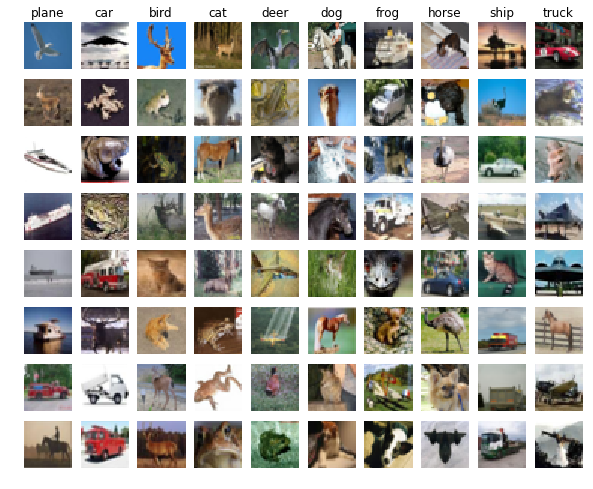

In [8]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [9]:
print X_train_feats.shape

(49000, 155)


In [15]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
iter_num = 25000
batch_size=200
reg = 0.0
lr = 0.1
stat = net.train(X_train_feats, y_train, 
          X_val_feats, y_val,
          num_iters=iter_num, 
          batch_size=batch_size,
          learning_rate=lr, 
          learning_rate_decay=0.95, 
          reg=reg, 
          verbose=True)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 25000: loss 2.302585
iteration 100 / 25000: loss 2.302623
iteration 200 / 25000: loss 2.141031
iteration 300 / 25000: loss 1.750948
iteration 400 / 25000: loss 1.648733
iteration 500 / 25000: loss 1.541743
iteration 600 / 25000: loss 1.438035
iteration 700 / 25000: loss 1.329149
iteration 800 / 25000: loss 1.241200
iteration 900 / 25000: loss 1.284062
iteration 1000 / 25000: loss 1.307376
iteration 1100 / 25000: loss 1.377635
iteration 1200 / 25000: loss 1.354711
iteration 1300 / 25000: loss 1.295015
iteration 1400 / 25000: loss 1.245220
iteration 1500 / 25000: loss 1.278420
iteration 1600 / 25000: loss 1.301583
iteration 1700 / 25000: loss 1.172983
iteration 1800 / 25000: loss 1.211729
iteration 1900 / 25000: loss 1.182522
iteration 2000 / 25000: loss 1.258159
iteration 2100 / 25000: loss 1.292462
iteration 2200 / 25000: loss 1.160060
iteration 2300 / 25000: loss 1.252037
iteration 2400 / 25000: loss 1.218268
iteration 2500 / 25000: loss 1.277454
iteration 2600 / 25000: 

In [17]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.594


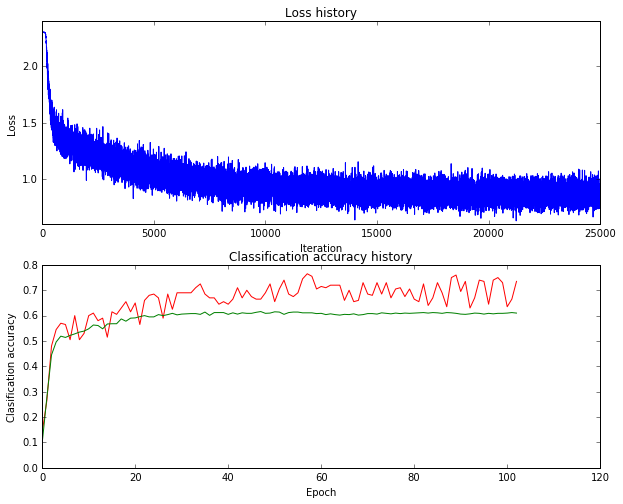

In [20]:
plt.subplot(2, 1, 1)
plt.plot(stat['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stat['train_acc_history'], label='train', color='red')
plt.plot(stat['val_acc_history'], label='val', color='green')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

# Visualize hidden units features

In [3]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [4]:
# reload 
from cs231n.classifiers.neural_net import TwoLayerNet
input_size = 32 * 32 * 3

num_classes = 10

hidden_size = 75
lr = 0.001
reg = 0.5
num_iters = 3500
batch_size = 200
# Train the network
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=num_iters, batch_size=batch_size,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 3500: loss 2.303146
iteration 100 / 3500: loss 1.951913
iteration 200 / 3500: loss 1.791024
iteration 300 / 3500: loss 1.669686
iteration 400 / 3500: loss 1.674539
iteration 500 / 3500: loss 1.570905
iteration 600 / 3500: loss 1.497870
iteration 700 / 3500: loss 1.662110
iteration 800 / 3500: loss 1.472971
iteration 900 / 3500: loss 1.406730
iteration 1000 / 3500: loss 1.392542
iteration 1100 / 3500: loss 1.567401
iteration 1200 / 3500: loss 1.498110
iteration 1300 / 3500: loss 1.443216
iteration 1400 / 3500: loss 1.522112
iteration 1500 / 3500: loss 1.388039
iteration 1600 / 3500: loss 1.521671
iteration 1700 / 3500: loss 1.394950
iteration 1800 / 3500: loss 1.278852
iteration 1900 / 3500: loss 1.416213
iteration 2000 / 3500: loss 1.470375
iteration 2100 / 3500: loss 1.395935
iteration 2200 / 3500: loss 1.395196
iteration 2300 / 3500: loss 1.352441
iteration 2400 / 3500: loss 1.457147
iteration 2500 / 3500: loss 1.385097
iteration 2600 / 3500: loss 1.408357
iteration 270

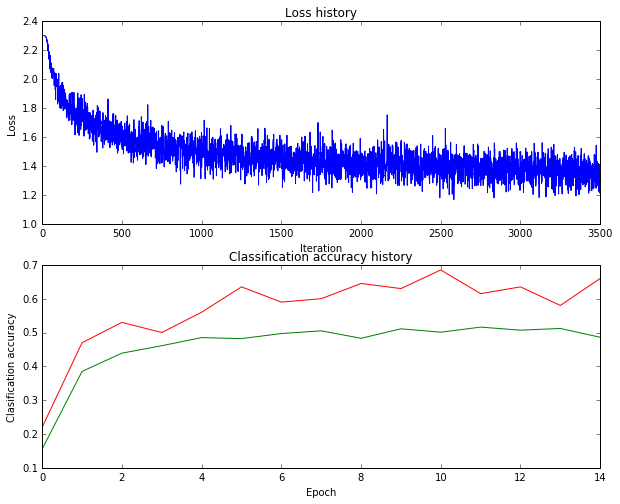

In [5]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train', color='red')
plt.plot(stats['val_acc_history'], label='val', color='green')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

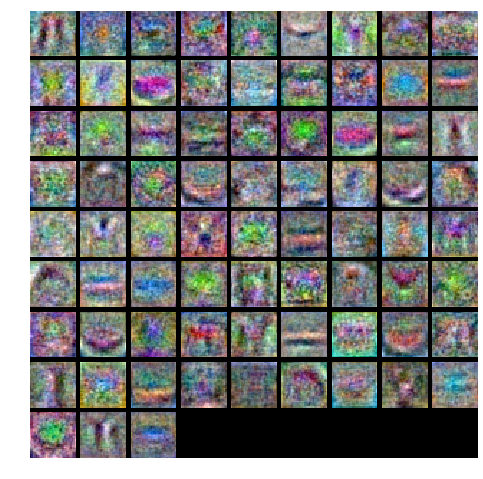

In [6]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

In [7]:
X_train_h1_feat = net.feat(X_train)
X_val_h1_feat = net.feat(X_val)
X_test_h1_feat = net.feat(X_test)

print("X_train_h1_feat = ", X_train_h1_feat.shape)
print("X_val_h1_feat = ", X_val_h1_feat.shape)
print("X_test_h1_feat = ", X_test_h1_feat.shape)

('X_train_h1_feat = ', (49000, 75))
('X_val_h1_feat = ', (1000, 75))
('X_test_h1_feat = ', (1000, 75))


In [8]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)

In [9]:
model = TSNE(n_components=2)

In [10]:
# X_train_h1_vis = model.fit_transform(X_train_h1_feat) 
# print("X_train_h1_vis = ", X_train_h1_vis.shape)
X_val_h1_vis = model.fit_transform(X_val_h1_feat) 
print("X_val_h1_vis = ", X_val_h1_vis.shape)
X_test_h1_vis = model.fit_transform(X_test_h1_feat) 
print("X_test_h1_vis = ", X_test_h1_vis.shape)

('X_val_h1_vis = ', (1000, 2))
('X_test_h1_vis = ', (1000, 2))


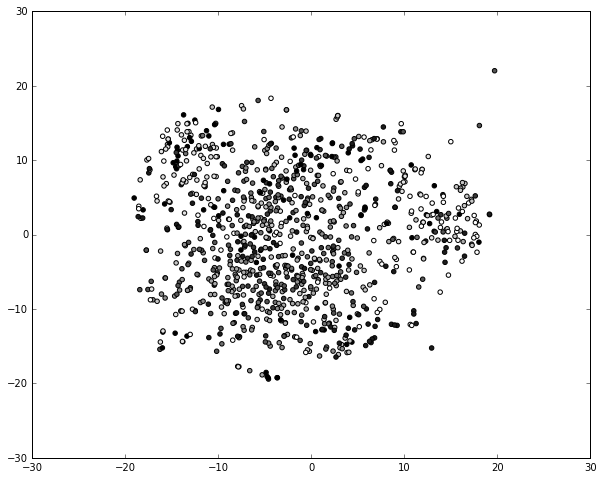

In [11]:
plt.scatter(X_val_h1_vis[:, 0], X_val_h1_vis[:, 1], marker='o', c=y_val)

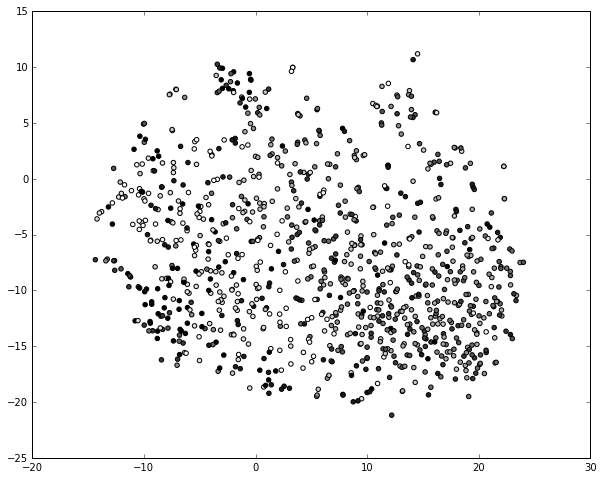

In [13]:
plt.scatter(X_test_h1_vis[:, 0], X_test_h1_vis[:, 1], marker='o', c=y_test)